# Computer Vision Capstone Project #1
-------

This is a project from the Computer Vision Nanodegree program on [Udacity](https://www.udacity.com/course/computer-vision-nanodegree--nd891). The project's instructions and data can be found [here](https://github.com/udacity/AIND-CV-FacialKeypoints) 

---

To complete the project, we’ll combine knowledge of computer vision techniques and deep learning to build and end-to-end facial keypoint recognition system!

There are three main parts to this project:

**Part 1** : Investigating [OpenCV](https://en.wikipedia.org/wiki/OpenCV), pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a [Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) in [Pytorch](https://en.wikipedia.org/wiki/PyTorch) to detect facial keypoints

* [Step 5](#step5): Build, Train and Test a CNN to Recognize Facial Keypoints

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 6](#step6): Build a Robust Facial Keypoints Detector


**Bonus** : Add Snapchat filter (e.g. sunglass) on any image identify using detected facial keypoints

* [Step 7](#step7): Add a sunglass filter on any image


## Requirements
To be able to follow along you will need to have the following packages installed:
pandas, numpy, opencv, pytorch, matplotlib



---
<a id='step0'></a>
## Step 0: Detect Faces Using a Haar Cascade Classifier

Have you ever wondered how Facebook automatically tags images with your friends' faces?   Or how high-end cameras automatically find and focus on a certain person's face?  Applications like these depend heavily on the machine learning task known as *face detection* -  which is the task of automatically finding faces in images containing people.  

At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

We use OpenCV's implementation of [Haar feature-based cascade classifiers](https://www.researchgate.net/publication/3940582_Rapid_Object_Detection_using_a_Boosted_Cascade_of_Simple_Features) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `detector_architectures` directory.


In [1]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 

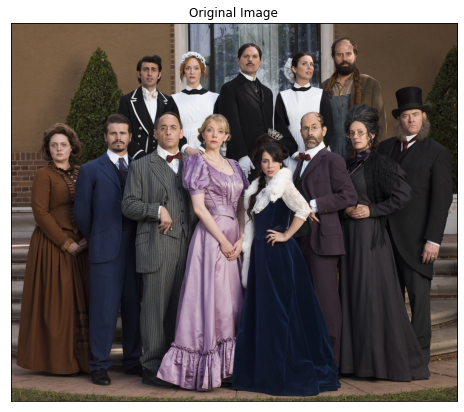

In [2]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image from BGR to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, we demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

We'll first convert the image from color to grayscale as explain in the paper. 

Then, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

Number of faces detected: 13


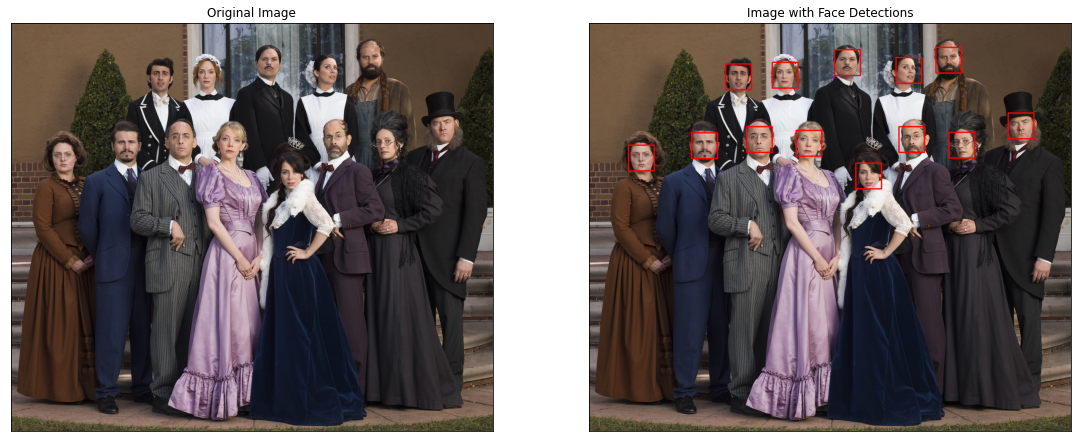

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (19,8))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Image with Face Detections')
ax2.imshow(image_with_detections)

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

---
<a id='step1'></a>

## Step 1: Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test your eye detector, we'll first read in a new test image with just a single face.

To set up an eye detector, use the stored parameters of the eye cascade detector, called ```haarcascade_eye.xml```, located in the `detector_architectures` subdirectory.  In the next code cell, create your eye detector and store its detections.


Second, since we've already run the face detector over this image, you should only search for eyes *within the rectangular face regions detected in ``faces``*.  This will minimize false detections and computation time.


In [4]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 

Number of faces detected: 1
Number of eyes detected: 2


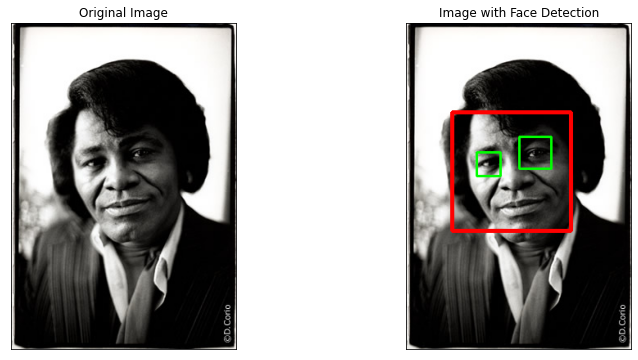

In [5]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image from BGR to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)
# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))  

# Extract the pre-trained face detector from an xml file
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')
# Detect the eyes in image
eyes = eye_cascade.detectMultiScale(gray, 1.25, 2)
# Print the number of faces detected in the image
print('Number of eyes detected:', len(eyes))

# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image) 

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    ## Get the Region Of Interest (ROI) to detect the eye inside the face rectangle
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_with_detections[y:y+h, x:x+w]
    ## Eye detection
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.25, 2)
    for e_x,e_y,e_w,e_h in eyes:
        cv2.rectangle(roi_color, (e_x,e_y), (e_x+e_w,e_y+e_h), (0,255,0), 2)  
    
# Display the image
fig = plt.figure(figsize = (13,6))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Image with Face Detection')
ax2.imshow(image_with_detections)

Notice that even though the image is a black and white image, we have read it in as a color image and so it will still need to be converted to grayscale in order to perform the most accurate face detection.


## Add face and eye detection to your laptop camera

It's time to kick it up a notch, and add face and eye detection to your laptop's camera!  Afterwards, you'll be able to show off your creation like in the gif shown below - made with a completed version of the code!  

<img src="images/laptop_face_detector_example.gif" width=400 height=300/>

Notice that not all of the detections here are perfect - and your result need not be perfect either.   You should spend a small amount of time tuning the parameters of your detectors to get reasonable results, but don't hold out for perfection.  If we wanted perfection we'd need to spend a ton of time tuning the parameters of each detector, cleaning up the input image frames, etc. You can think of this as more of a rapid prototype. 

The next cell contains code for a wrapper function called ``laptop_camera_face`` that, when called, will activate your laptop's camera.  You will place the relevant face and eye detection code in this wrapper function to implement face/eye detection and mark those detections on each image frame that your camera captures.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [6]:

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep the video stream open
    while rval:
        ## Face detection code here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)
            ## Get the Region Of Interest (ROI) to detect the eye inside the face rectangle
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            ## Eye detection
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.25, 2)
            for e_x,e_y,e_w,e_h in eyes:
                cv2.rectangle(roi_color, (e_x,e_y), (e_x+e_w,e_y+e_h), (0,255,0), 2)
            
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", frame)
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [7]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

In [8]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 

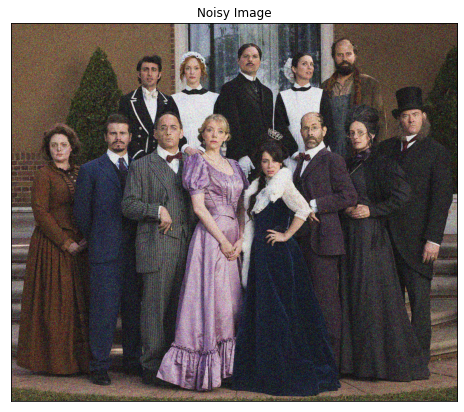

In [22]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_copy = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 50
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_copy + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

Number of faces detected: 10


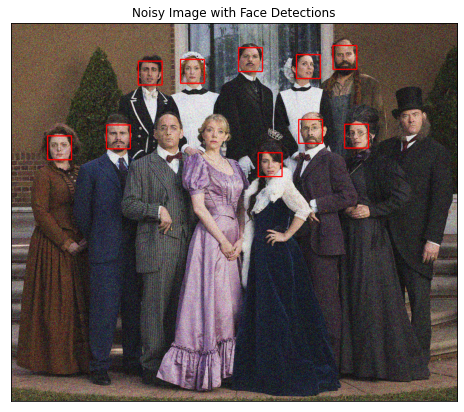

In [23]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

### De-noise this image for better face detection

Time to get your hands dirty: using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - de-noise this image enough so that all the faces in the image are properly detected.  Once you have cleaned the image in the next cell, use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

You can find its [official documentation here]([documentation for denoising](http://docs.opencv.org/trunk/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476) and [a useful example here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html).


In [24]:
denoised_image = cv2.fastNlMeansDenoisingColored(
    image_with_noise, templateWindowSize=5, searchWindowSize=10, h=70
)

Number of faces detected: 13


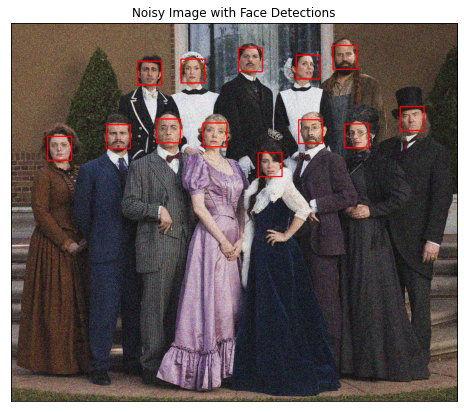

In [26]:
# Convert the RGB  image to grayscale
gray_denoised = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml filefixed
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_denoised, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

Now that we have developed a simple pipeline for detecting faces using OpenCV - let's start playing around with a few fun things we can do with all those detected faces!

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.  

Below is an animated gif showing the result of an edge-detected cat [taken from Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses), where the image is gradually blurred more and more prior to edge detection.  When the animation begins you can't quite make out what it's a picture of, but as the animation evolves and local structures are removed via blurring the cat becomes visible in the edge-detected image.

<img src="images/Edge_Image.gif" width=400 height=300/>

Edge detection is a **convolution** performed on the image itself, and you can read about **Canny edge detection** on [this OpenCV documentation page](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

In [27]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 

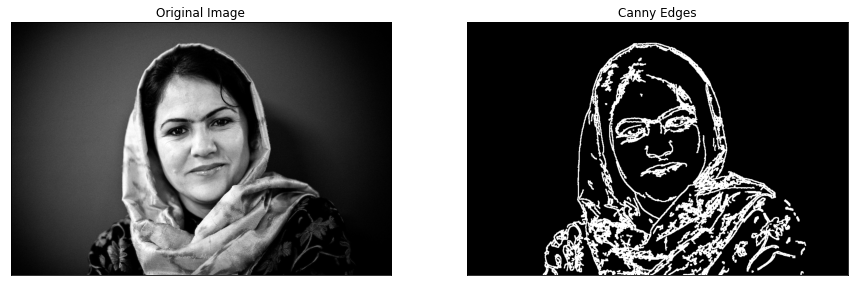

In [28]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

### Blur the image *then* perform edge detection

In the next cell, you will repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

Blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) - and use an *averaging kernel* of width equal to 4.

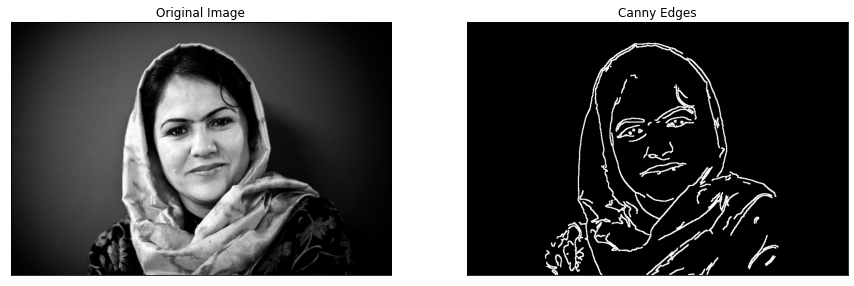

In [29]:
# Use an averaging kernel, and a kernel width equal to 4
avg_kernel = np.ones((4,4),np.float32)/16
# blur_gray = cv2.filter2D(gray,-1,avg_kernel)
blur_gray = cv2.blur(gray,(4,4)) # other blur functions: GaussianBlur, medianBlur, bilateralFilterbilateralFilter

## Then perform Canny edge detection and display the output
edges = cv2.Canny(blur_gray,100,200)
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's an example of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>


### Use blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out!  Make sure to adjust the parameters of the *averaging* blur filter to completely obscure this person's identity.

In [30]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 

Number of faces detected: 13


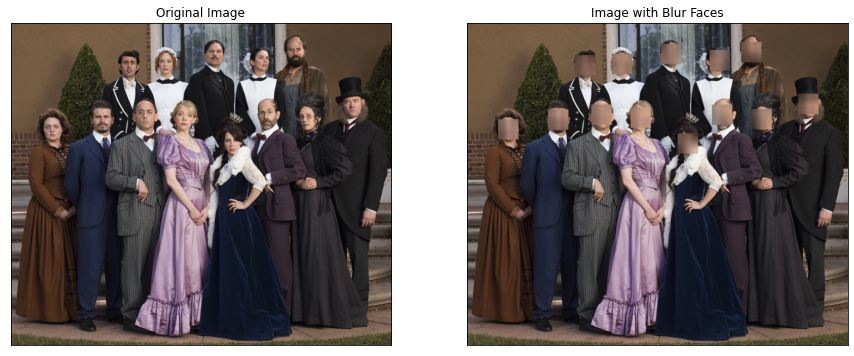

In [31]:
# Load in the image
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect the faces in image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 2, 5)
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

avg_kernel = np.ones((75,75),np.float32)/75**2
# Get the bounding box for each detected face and Blur the bounding box around it
for (x,y,w,h) in faces:
    ROI = image_with_detections[y:y+h, x:x+w]
    blur = cv2.filter2D(ROI,-1,avg_kernel)
    image_with_detections[y:y+h, x:x+w] = blur

# Display the image
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Image with Blur Faces')
ax2.imshow(image_with_detections)

### Build identity protection into your laptop camera

In this optional task you can add identity protection to your laptop camera, using the previously completed code where you added face detection to your laptop camera - and the task above.  You should be able to get reasonable results with little parameter tuning - like the one shown in the gif below.

<img src="images/laptop_blurer_example.gif" width=400 height=300/>

As with the previous video task, to make this perfect would require significant effort - so don't strive for perfection here, strive for reasonable quality.  

The next cell contains code a wrapper function called ``laptop_camera_identity_hider`` that - when called  - will activate your laptop's camera.  You need to place the relevant face detection and blurring code developed above in this function in order to blur faces entering your laptop camera's field of view.

Before adding anything to the function you can call it to get a hang of how it works - a small window will pop up showing you the live feed from your camera, you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [32]:
def laptop_camera_go():
    # Create instance of video capturer
#     cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    avg_kernel = np.ones((75,75),np.float32)/75**2
    # Keep the video stream open
    while rval:
        ## Face detection code here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        for (x,y,w,h) in faces:
            ## Get the Region Of Interest (ROI) to detect face rectangle and blur it
            roi_color = frame[y:y+h, x:x+w]
            blur = cv2.filter2D(roi_color,-1,avg_kernel)
            frame[y:y+h, x:x+w] = blur
            
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated with blur faces", frame)
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [33]:
# Run laptop identity hider
laptop_camera_go()

---
<a id='step5'></a>

## Step 5: Build, Train and Test a CNN to Recognize Facial Keypoints

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.  In this stage of the project you will create your own end-to-end pipeline - employing convolutional networks in Pytorch along with OpenCV - to apply a "selfie" filter to streaming video and images.  

You will start by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  We then guide you towards OpenCV to expanding your detection algorithm to more general images.  What are facial keypoints?  Let's take a look at some examples.

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.


### Make a facial keypoint detector

But first things first: how can we make a facial keypoint detector?  Well, at a high level, notice that facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). We've already downloaded this data and placed it in the `data` directory. Make sure that you have both the *training* and *test* data files.  The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates.  This wonderful resource also has a substantial testing set, which we will use in tinkering with our convolutional network.

To load in this data, run the Python cell below - notice we will load in both the training and testing sets.


In [34]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 
import pandas as pd
import torch
from sklearn.utils import shuffle
from utils import *

In [35]:
trainloader = data_loader("data/training.zip")
validloader = data_loader("data/training.zip", is_validation=True)

The `plot_data` function originates from [utils.py in the project folder on github](https://github.com/udacity/AIND-CV-FacialKeypoints).  Please take the time now to review this function.  

Note that in the function `data_loader` each set of facial landmarks have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$. This function is inspired from `load_data` in [utils.py in the project folder on github](https://github.com/udacity/AIND-CV-FacialKeypoints)

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

tensor(-0.8444) tensor(0.9279)


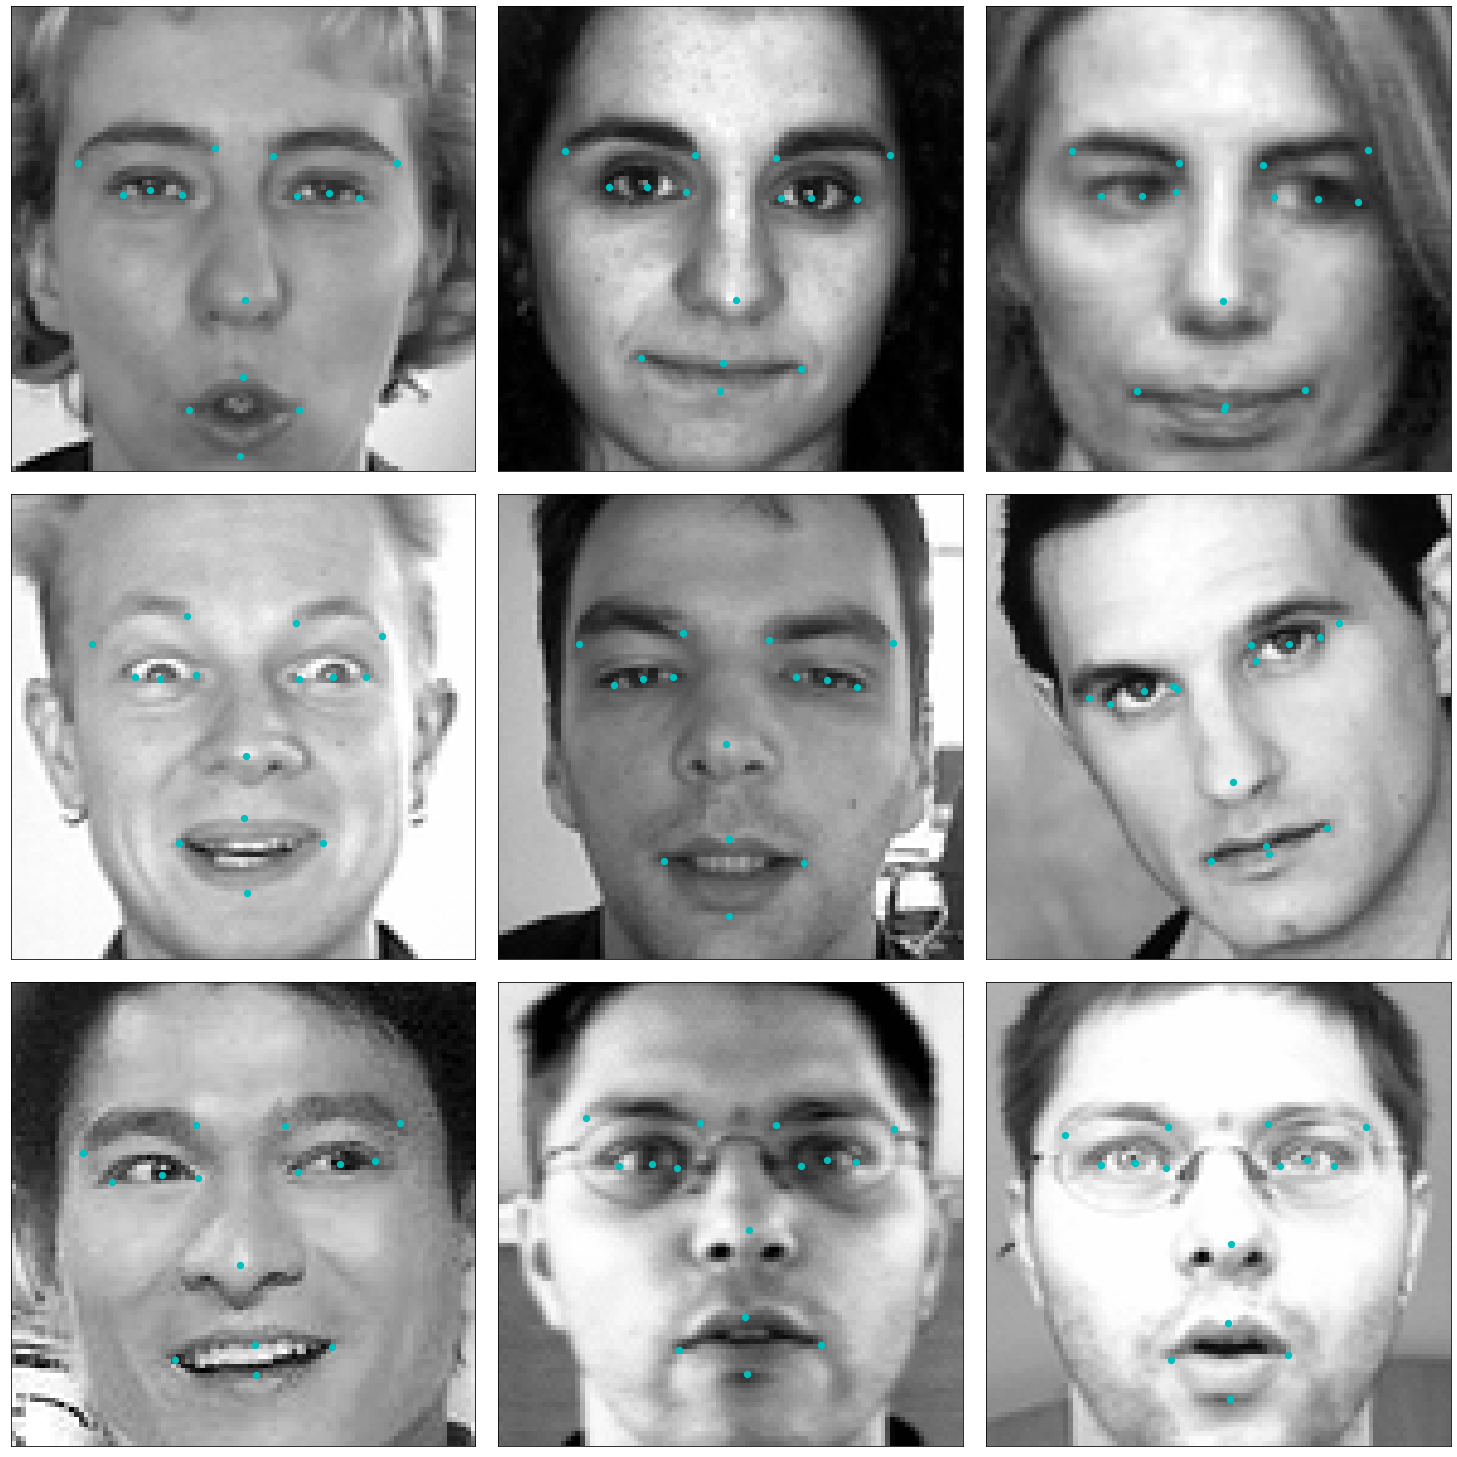

In [36]:
train_X, train_y = next(iter(trainloader))

print(train_y.min(), train_y.max())

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(train_X[i].numpy(), train_y[i].numpy(), ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function above to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

### Specify the CNN Architecture

In this section, you will specify a neural network for predicting the locations of facial keypoints.  Use the code cell below to specify the architecture of your neural network.

Your network should accept a $96 \times 96$ grayscale image as input, and it should output a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.  If you are not sure where to start, you can find some useful starting architectures in [this blog](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), but you are not permitted to copy any of the architectures that you find online.

The CNN architecture is define in the [MyModel.py](./MyModel.py)

In [37]:
from MyModel import ConvNet
# Summarize the model
model = ConvNet()
model

ConvNet(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.2, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout(p=0.2, inplace=False)
  )
  (regressor): Sequential(
    (0): Linear(in_features=9216, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=128, out_features=30, bias=True)
  )
)


### Train the Model

After specifying your architecture, you'll need to train the model to detect facial keypoints'

In [38]:
## Initialize the loss function and the optimizer 
from torch import nn, optim
from torch.nn import functional as F

criterion = nn.SmoothL1Loss() # the loss function
optimizer = optim.Adam(model.parameters(), lr=0.03) # the optimizer, here Adam optimizer

In [39]:
%%time

n_epochs = 300 # number of epochs
best_valid_loss = np.inf # set best validation loss to infinity
stop_after = 5 # stop if the validation loss doesn't improve after certain epochs
stop_counter = 0
for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0
    
    model.train() # put the model in train mode
    for train_X, train_y in data_loader("data/training.zip"):
        optimizer.zero_grad()
        outputs = model(train_X)
        loss = criterion(outputs, train_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()/len(train_X)
        
    else:
        model.eval() # put the model in validation mode
        for valid_X, valid_y in data_loader("data/training.zip", is_validation=True):
            outputs = model(valid_X)
            loss = criterion(outputs, valid_y)

            valid_loss += loss.item()/len(valid_X)
        
        print(
            "Epoch {}/{} - Loss: {:0.9f}... - Valid_Loss: {:0.9f}...".format(
                epoch, n_epochs, train_loss, valid_loss
            )
        )
        
        if valid_loss < best_valid_loss:
            print("Valid Loss improved from {:0.9f} to {:0.9f}, saving model".format(best_valid_loss, valid_loss))
            best_valid_loss = valid_loss
            stop_counter = 0
            ## Save the model 
            torch.save(model, "model.pt")
        else:
            stop_counter += 1
    if stop_counter >= stop_after:
        print("Valid Loss not improving since {} epochs, Early Stopping".format(stop_after))
        break
        
model = torch.load("model.pt") # Load the best model at the end of the training

Epoch 1/300 - Loss: 367.347357740... - Valid_Loss: 4.145207107...
Valid Loss improved from inf to 4.145207107, saving model
Epoch 2/300 - Loss: 3.668476590... - Valid_Loss: 0.277471745...
Valid Loss improved from 4.145207107 to 0.277471745, saving model
Epoch 3/300 - Loss: 0.331103349... - Valid_Loss: 0.034234047...
Valid Loss improved from 0.277471745 to 0.034234047, saving model
Epoch 4/300 - Loss: 0.154771969... - Valid_Loss: 0.020792388...
Valid Loss improved from 0.034234047 to 0.020792388, saving model
Epoch 5/300 - Loss: 0.098373608... - Valid_Loss: 0.025210491...
Epoch 6/300 - Loss: 0.084233786... - Valid_Loss: 0.015259902...
Valid Loss improved from 0.020792388 to 0.015259902, saving model
Epoch 7/300 - Loss: 0.070102291... - Valid_Loss: 0.025400146...
Epoch 8/300 - Loss: 0.064196834... - Valid_Loss: 0.013487651...
Valid Loss improved from 0.015259902 to 0.013487651, saving model
Epoch 9/300 - Loss: 0.046624323... - Valid_Loss: 0.016923302...
Epoch 10/300 - Loss: 0.042557074..

In [40]:
model = torch.load("_model.pt") # Load the saved model

### Test the model: Visualize a Subset of the Test Predictions

Execute the code cells below to visualize your model's predicted keypoints on a subset of the testing images.

In [41]:
testloader = data_loader("data/test.zip", train=False)

In [42]:
test_X = next(iter(testloader))

model.eval()
y_preds = model(test_X)
y_preds.detach().numpy().min(), y_preds.detach().numpy().max()

(-0.74590176, 0.8412821)

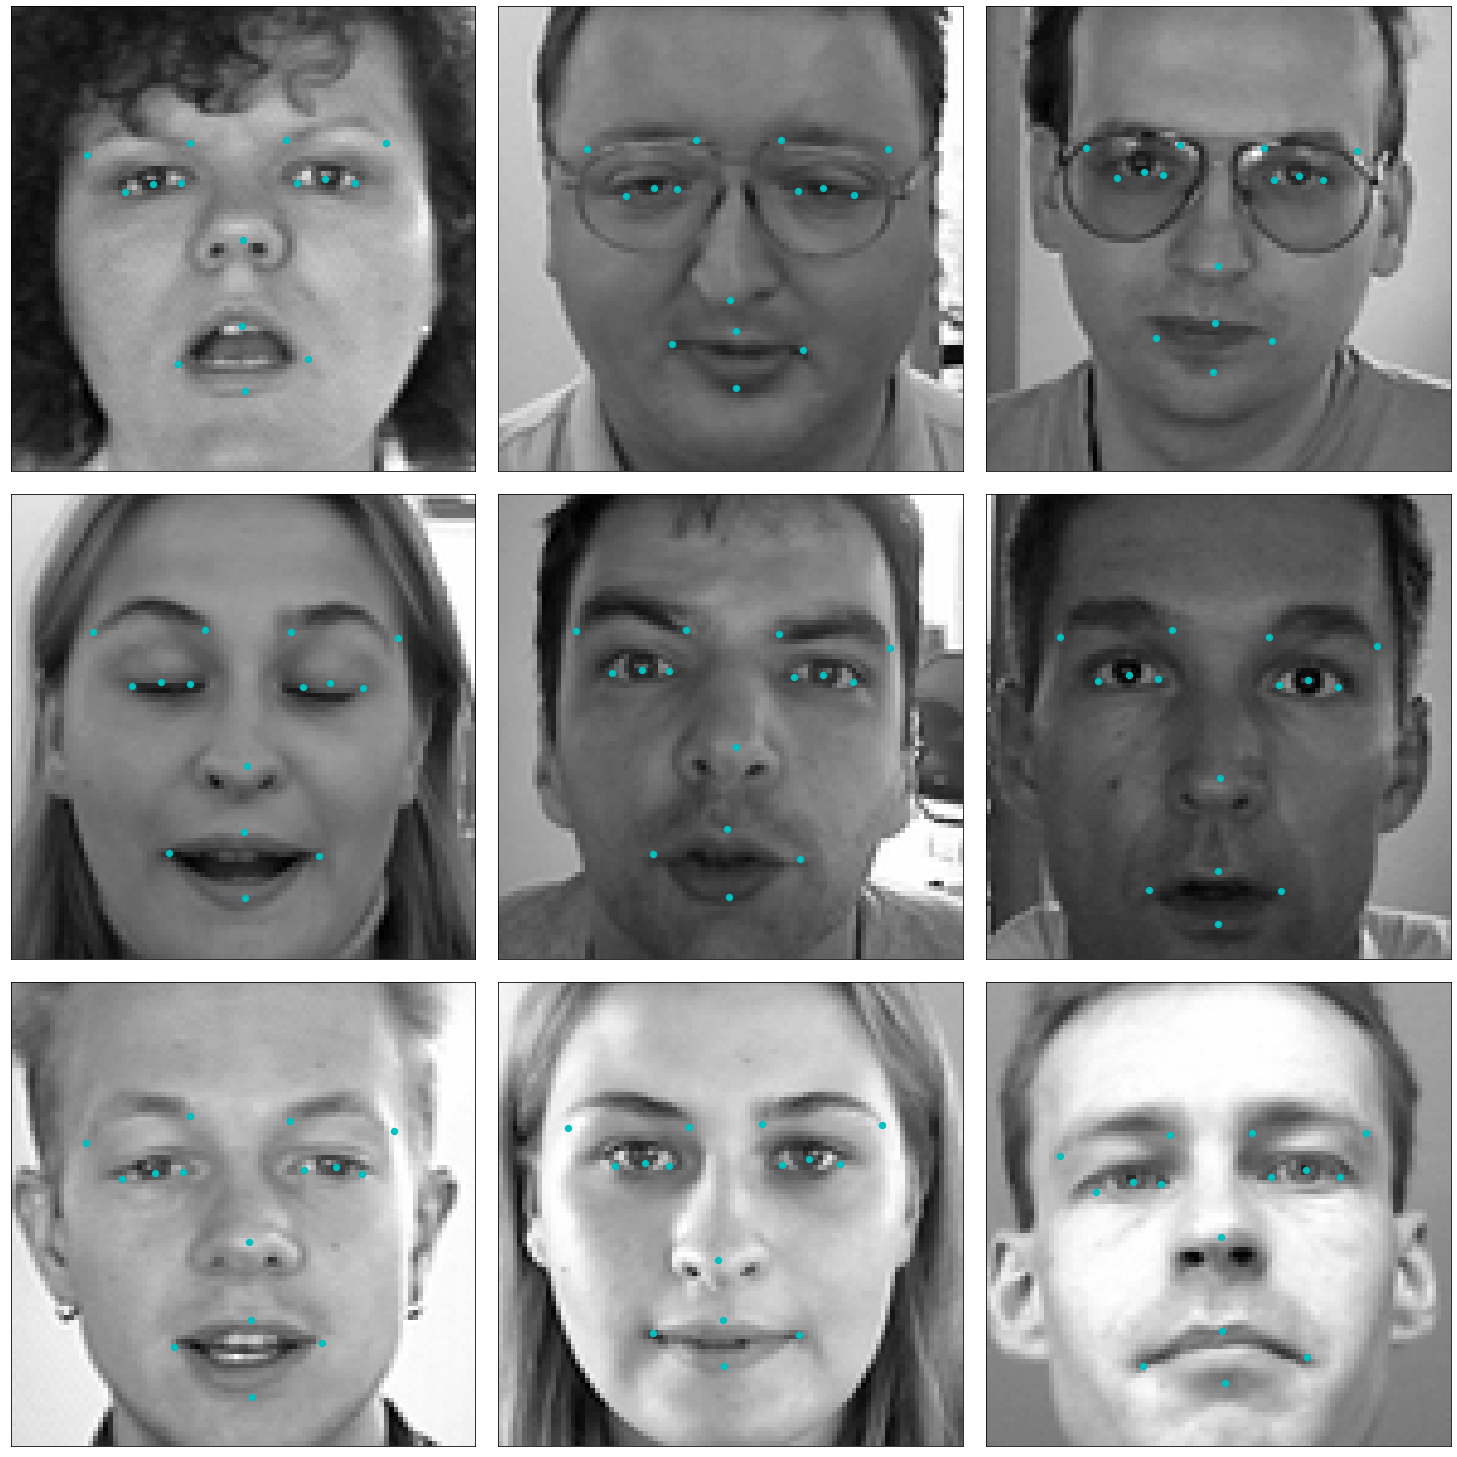

In [43]:
test_X = next(iter(testloader))

y_preds = model(test_X)
type(y_preds)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(test_X[i].detach().numpy(), y_preds[i].detach().numpy(), ax)

---
<a id='step6'></a>

## Step 6: Facial Keypoints Detector


Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size. These are the steps to perform: 

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

**Note**: step 4 can be the trickiest because remember your convolutional network is only trained to detect facial keypoints in $96 \times 96$ grayscale images where each pixel was normalized to lie in the interval $[0,1]$, and remember that each facial keypoint was normalized during training to the interval $[-1,1]$.  This $[0,1]$ - practically speaking - to paint detected keypoints onto a test face you need to perform this same pre-processing to your candidate face  - that is after detecting it you should resize it to $96 \times 96$ and normalize its values before feeding it into your facial keypoint detector.  To be shown correctly on the original image the output keypoints from your detector then need to be shifted and re-normalized from the interval $[-1,1]$ to the width and height of your detected face.

When complete you should be able to produce example images like the one below

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

In [44]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 
from utils import *
from MyModel import ConvNet

Number of faces detected: 2


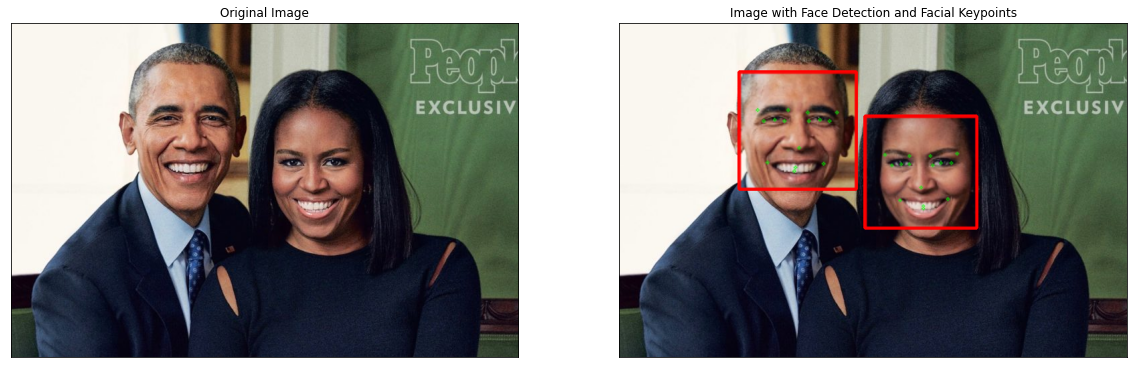

In [45]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    
    roi_color = image_with_detections[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    rh, rw = roi_gray.shape
    roi_color_resized = cv2.resize(roi_color, (96,96))
    gray_tensor = image_to_tensor( cv2.resize(roi_gray, (96,96)) )
    landmarks = undo_landmarks_normalization( model(gray_tensor) )
    for cx, cy in zip(landmarks[0::2], landmarks[1::2]):
        cv2.circle(roi_color_resized, (cx,cy), radius=1, color=(0,255,0))

    image_with_detections[y:y+h, x:x+w] = cv2.resize(roi_color_resized, (rh, rw))
    

# Display the image with the detections
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Image with Face Detection and Facial Keypoints')
ax2.imshow(image_with_detections)

### Add facial keypoints to your laptop camera

Now you can add facial keypoint detection to your laptop camera - as illustrated in the gif below.

<img src="images/facial_keypoint_test.gif" width=400 height=300/>


In [46]:

def laptop_camera_go():
    # Create instance of video capturer
#     cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    avg_kernel = np.ones((75,75),np.float32)/75**2
    # Keep the video stream open
    while rval:
        ## Face detection code here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        for (x,y,w,h) in faces:
            # Add a red bounding box to the detections image
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 3)

            roi_color = frame[y:y+h, x:x+w]
            roi_gray = gray[y:y+h, x:x+w]
            rh, rw = roi_gray.shape
            roi_color_resized = cv2.resize(roi_color, (96,96))
            gray_tensor = image_to_tensor( cv2.resize(roi_gray, (96,96)) )
            landmarks = undo_landmarks_normalization( model(gray_tensor) )
            for cx, cy in zip(landmarks[0::2], landmarks[1::2]):
                cv2.circle(roi_color_resized, (cx,cy), radius=1, color=(0,255,0))

            frame[y:y+h, x:x+w] = cv2.resize(roi_color_resized, (rh, rw))
            
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated - facial keypoints", frame)
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [47]:
# Run your keypoint face painter
laptop_camera_go()

<a id='step7'></a>
## Step 7: Add a filter using facial keypoints

Using your freshly minted facial keypoint detector pipeline you can now do things like add fun filters to a person's face automatically.  In this section you can play around with adding sunglasses automatically to each individual's face in an image as shown in a demonstration image below.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

To produce this effect an image of a pair of sunglasses shown in the Python cell below.

In [48]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2       
import time 
import torch
from utils import *
from MyModel import ConvNet

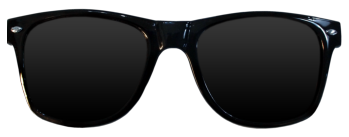

In [49]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

This image is placed over each individual's face using the detected eye points to determine the location of the sunglasses, and eyebrow points to determine the size that the sunglasses should be for each person (one could also use the nose point to determine this).  

Notice that this image actually has *4 channels*, not just 3. 

In [50]:
# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

The sunglasses image has shape: (1123, 3064, 4)


It has the usual red, blue, and green channels any color image has, with the 4th channel representing the transparency level of each pixel in the image.  Here's how the transparency channel works: the lower the value, the more transparent the pixel will become.  The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen. 

This is how we can place this image of sunglasses on someone's face and still see the area around of their face where the sunglasses lie - because these pixels in the sunglasses image have been made completely transparent.

Lets check out the alpha channel of our sunglasses image in the next Python cell.  Note because many of the pixels near the boundary are transparent we'll need to explicitly print out non-zero values if we want to see them. 

In [51]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

the alpha channel here looks like
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 the non-zero values of the alpha channel look like
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


This means that when we place this sunglasses image on top of another image, we can use the transparency channel as a filter to tell us which pixels to overlay on a new image (only the non-transparent ones with values greater than zero).

One last thing: it's helpful to understand which keypoint belongs to the eyes, mouth, etc. So, in the image below, we also display the index of each facial keypoint directly on the image so that you can tell which keypoints are for the eyes, eyebrows, etc.

<img src="images/obamas_points_numbered.png" width=500 height=500/>

With this information, you're well on your way to completing this filtering task!  See if you can place the sunglasses automatically on the individuals in the image loaded in / shown in the next Python cell.ccelltellar

Check out [this article](https://towardsdatascience.com/facial-keypoints-detection-deep-learning-737547f73515)

Number of faces detected: 13


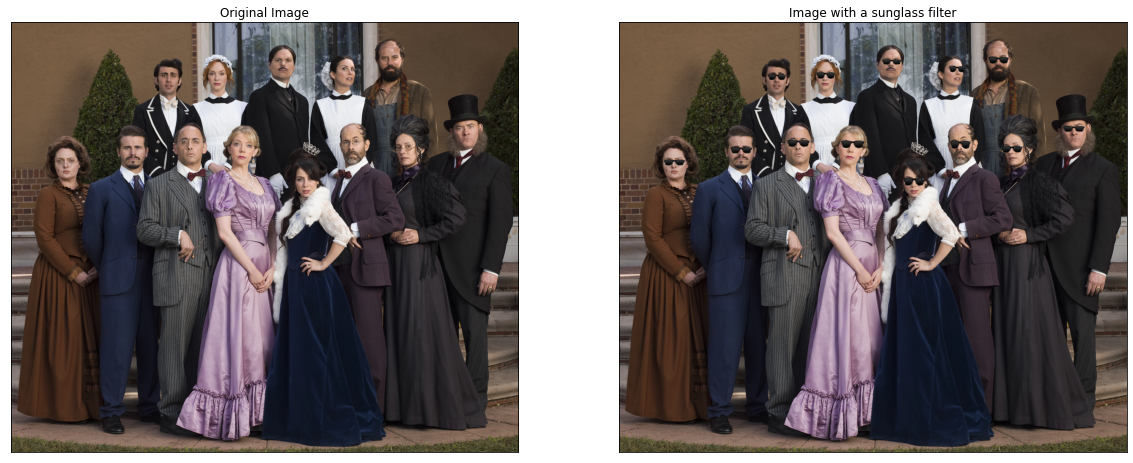

In [52]:
model = torch.load("_model.pt") # Load the saved model

# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained facecell detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
# image = cv2.flip(image, 1)
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    
    roi_color = image_with_detections[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    
    rh, rw = roi_gray.shape
    roi_color_resized = cv2.resize(roi_color, (96,96))
    gray_tensor = image_to_tensor( cv2.resize(roi_gray, (96,96)) )
    
    landmarks = undo_landmarks_normalization( model(gray_tensor) )
    
    points = []
    for (cx, cy) in zip(landmarks[0::2], landmarks[1::2]):
        points += [(cx,cy)]
    
    sunglass_width = int((points[7][0]-points[9][0])*1.1)
    sunglass_height = int((points[10][1]-points[8][1])/1.1) 
    

    a = int(points[9][1])
    b = int(points[9][0])    

    sunglass_resized = cv2.resize(sunglasses, (sunglass_width, sunglass_height), interpolation = cv2.INTER_CUBIC)
    transparent_region = sunglass_resized[:,:,:3] != 0  
    
    roi_color_resized[a :a+ sunglass_height, b :b+ sunglass_width, :][transparent_region] =  sunglass_resized[:,:,:3][transparent_region]        
    image_with_detections[y:y+h, x:x+w] = cv2.resize(roi_color_resized, (rh, rw), interpolation = cv2.INTER_CUBIC) 
    

# Display the image with the detections
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Image with a sunglass filter')
ax2.imshow(image_with_detections)


### Add a filter using facial keypoints to your laptop camera 

Now you can add the sunglasses filter to your laptop camera - as illustrated in the gif below.

<img src="images/mr_sunglasses.gif" width=250 height=250/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for adding sunglasses to someone's face in the previous optional exercise and you should be good to go!

In [53]:
def laptop_camera_go():
    # Create instance of video capturer
#     vc = cv2.VideoCapture(0) # use your pc webcam
    vc = cv2.VideoCapture("videos/young_sheldon_s02_p02.mp4") # use a video file

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)
    # Keep the video stream open
    while rval:
        ## Face detection code here
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        for (x,y,w,h) in faces:
            
            roi_color = frame[y:y+h, x:x+w]
            roi_gray = gray[y:y+h, x:x+w]

            rh, rw = roi_gray.shape
            roi_color_resized = cv2.resize(roi_color, (96,96))
            gray_tensor = image_to_tensor( cv2.resize(roi_gray, (96,96)) )

            landmarks = undo_landmarks_normalization( model(gray_tensor) )

            points = []
            for (cx, cy) in zip(landmarks[0::2], landmarks[1::2]):
                points += [(cx,cy)]

            sunglass_width = int((points[7][0]-points[9][0])*1.1)
            sunglass_height = int((points[10][1]-points[8][1])/1.1) 

            a = int(points[9][1])
            b = int(points[9][0])    

            sunglass_resized = cv2.resize(sunglasses, (sunglass_width, sunglass_height), interpolation = cv2.INTER_CUBIC)
            transparent_region = sunglass_resized[:,:,:3] != 0  

            roi_color_resized[a :a+ sunglass_height, b :b+ sunglass_width, :][transparent_region] =  sunglass_resized[:,:,:3][transparent_region]        
            frame[y:y+h, x:x+w] = cv2.resize(roi_color_resized, (rh, rw), interpolation = cv2.INTER_CUBIC) 
    
            
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated with sunglass filter", frame)
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            # Destroy windows 
            cv2.destroyAllWindows()
            
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [54]:
# Load facial landmark detector model
model = torch.load('_model.pt')

# Run sunglasses painter
laptop_camera_go()